In [51]:
import re
from os import makedirs

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from common import ROOT

In [50]:
data_path = ROOT + "/gpt/data/game_of_thrones.txt"
train_path = ROOT + "/gpt/data/game_of_thrones/train/"
val_path = ROOT + "/gpt/data/game_of_thrones/val/"

In [7]:
with open(data_path, "r") as f:
    data = f.read()
len(data)

1605965

In [31]:
chapters = re.split(r"\n\n[\n]+", data)
len(chapters)

83

(19345.0, 8698.110731024102, 19, 39825)

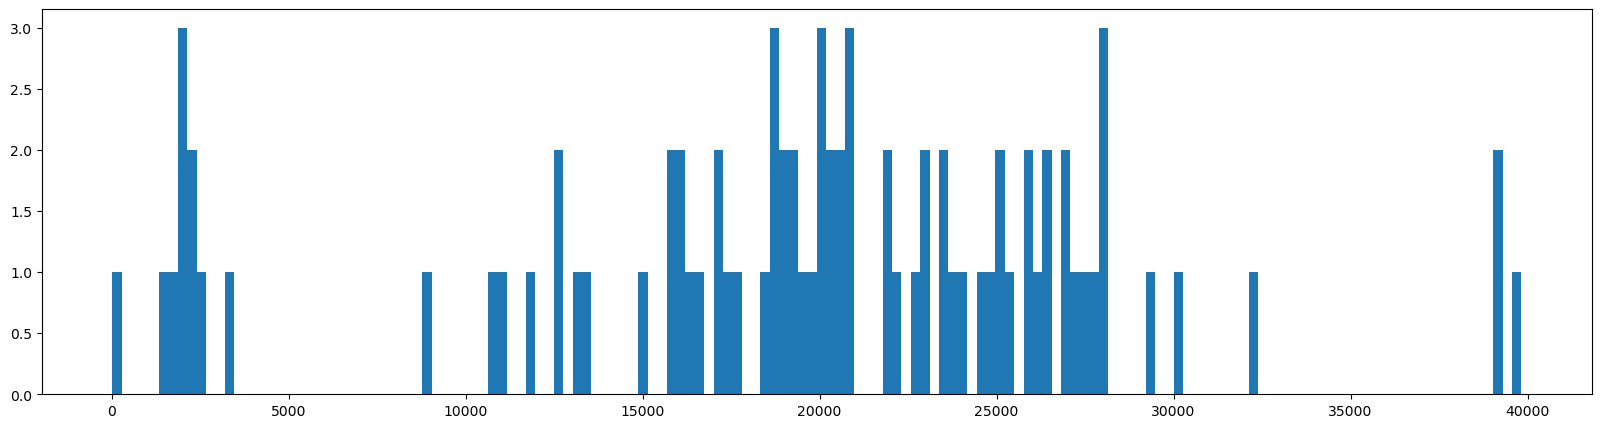

In [32]:
lengths = [len(chapter) for chapter in chapters]
plt.figure(figsize=(20, 5))
plt.hist(lengths, bins=50)
np.mean(lengths), np.std(lengths), np.min(lengths), np.max(lengths)

In [48]:
chapters_train, chapters_val = train_test_split(chapters, test_size=0.15)
len(chapters_train), len(chapters_val)

(70, 13)

(19258.22857142857, 8369.092466879769, 19, 39137)

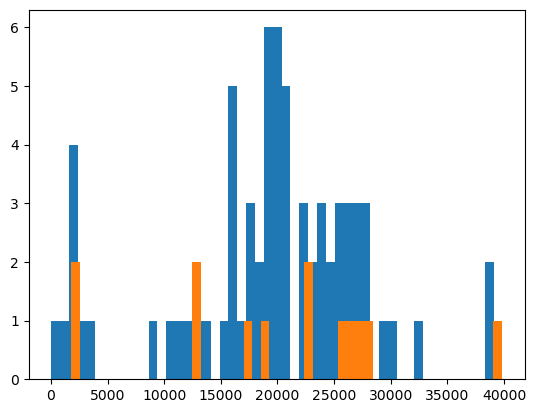

In [49]:
lengths = [len(chapter) for chapter in chapters_train]
lengths_val = [len(chapter) for chapter in chapters_val]
plt.hist(lengths, bins=50)
plt.hist(lengths_val, bins=50)
np.mean(lengths), np.std(lengths), np.min(lengths), np.max(lengths)

In [52]:
makedirs(train_path, exist_ok=True)
makedirs(val_path, exist_ok=True)        

In [59]:
for i, chapter in enumerate(chapters_train):
    with open(train_path + f"{i}.txt", "w") as f:
        f.write(chapter.replace("\n\n", "\n"))

for i, chapter in enumerate(chapters_val):
    with open(val_path + f"{i}.txt", "w") as f:
        f.write(chapter.replace("\n\n", "\n"))